In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import warnings
warnings.filterwarnings('ignore')

import os
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [66]:
kith_queries = pd.read_csv('KITH_500rand_sqs_sorted_aucs_2.txt', "\t")

In [70]:
### labelling dataset as 0 or 1 based on desired MW-auc (Refquery)

mw_series = kith_queries['MW-auc']
desired_auc = 0.594

for i in range(0, len(mw_series)):
    if kith_queries['MW-auc'][i] >= desired_auc:
        kith_queries['MW-auc'][i] = 1
    else:
         kith_queries['MW-auc'][i] = 0

In [72]:
kith_queries['MW-auc'].describe

<bound method NDFrame.describe of 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
Name: MW-auc, Length: 500, dtype: float64>

In [99]:
#for i in range(0, len(kith_queries['MW-auc'])):
#    print(kith_queries['MW-auc'][i])

In [73]:
X_train, X_test, y_train, y_test = train_test_split(kith_queries[['Ac0', 'Ac1', 'Ac2', 'Ac3', 'Ac4', 
                                                                'Do0', 'Do1', 'Do2', 'Ri0', 'Ri1',]], 
                                                    kith_queries['MW-auc'], random_state=42)

In [74]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (375, 10)
y_train shape: (375,)


In [75]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
lr_pred = lr.predict(X_test)

In [118]:
lr_cv = LogisticRegressionCV(cv=5, random_state=42)
lr_cv_fitting= lr_cv.fit(X_train, y_train)
cross_val_score(lr_cv, X_train, y_train, cv=5, scoring='accuracy').mean()


0.9707358937885255

In [78]:
y_predicted_lrcv = lr_cv_fitting.predict(X_test)

In [79]:
print(metrics.accuracy_score(y_test, y_predicted_lrcv))

0.968


In [84]:
### Classification report

print(metrics.classification_report(y_test, y_predicted_lrcv))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       114
         1.0       0.82      0.82      0.82        11

    accuracy                           0.97       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.97      0.97      0.97       125



In [83]:
### Probability of predicting y

y_predicted_prob_lrcv = lr_cv_fitting.predict_proba(X_test)[:, 1]

In [86]:
### ROC Curve

fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_predicted_prob_lrcv)

No handles with labels found to put in legend.


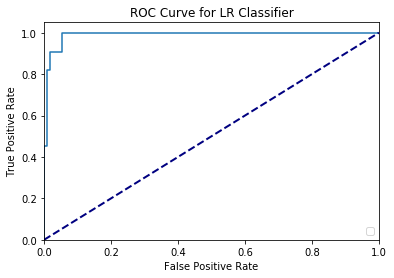

In [87]:
### Plotting ROC Curve

plt.figure()
lw_1 = 2
plt.plot(fpr_lr, tpr_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw_1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LR Classifier')
plt.legend(loc="lower right")
plt.show()

In [88]:
### AUC Score
from sklearn.metrics import roc_auc_score

auc_score_lrcv = roc_auc_score(y_test, y_predicted_prob_lrcv)
print("\n\n AUC score for LR Classifier: ",auc_score_lrcv)



 AUC score for LR Classifier:  0.9904306220095694


### Random Forest

In [91]:

rfc = RandomForestClassifier(max_depth=2, random_state=42)


### cross-validate the entire process
### thus, preprocessing occurs within each fold of cross-validation
rfc_cv_clf = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')


rfc_fitting = rfc.fit(X_train, y_train)

In [92]:
cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9360312944523471

### RF Performance

No handles with labels found to put in legend.


Accuracy of RF: 0.912 


Classification Report of RF: 
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       114
         1.0       0.00      0.00      0.00        11

    accuracy                           0.91       125
   macro avg       0.46      0.50      0.48       125
weighted avg       0.83      0.91      0.87       125
 




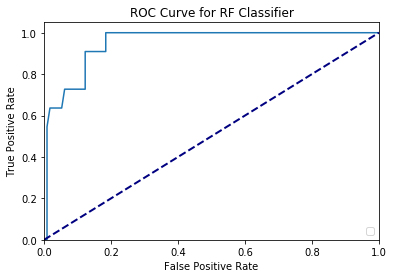



 AUC score for RF Classifier:  0.9497607655502392


In [96]:
### applying the model on test data
y_predicted_rfc = rfc_fitting.predict(X_test)

### accuracy of rfc
print("Accuracy of RF:", metrics.accuracy_score(y_test, y_predicted_rfc),"\n\n")

### classification report
print("Classification Report of RF: \n", metrics.classification_report(y_test, y_predicted_rfc), "\n\n")

### probability of predicting correct y
y_predicted_prob_rfc = rfc_fitting.predict_proba(X_test)[:, 1]

### ROC Curve
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_predicted_prob_rfc)

### plotting ROC curve
plt.figure()
lw_1 = 2
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw_1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RF Classifier')
plt.legend(loc="lower right")
plt.show()

### AUC score
auc_score_rfc = roc_auc_score(y_test, y_predicted_prob_rfc)
print("\n\n AUC score for RF Classifier: ",auc_score_rfc)

### Gradient Boosted Trees

In [97]:
from sklearn import ensemble

### Fit regression model
params = {'n_estimators': 50, 'min_samples_split': 2,
          'learning_rate': 0.1}
clf_gbt = ensemble.GradientBoostingClassifier(**params)

gbtc = clf_gbt.fit(X_train, y_train)

### GBT Performance

No handles with labels found to put in legend.


Accuracy of GBT: 0.928 


Classification Report of GBT: 
               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       114
         1.0       0.67      0.36      0.47        11

    accuracy                           0.93       125
   macro avg       0.80      0.67      0.72       125
weighted avg       0.92      0.93      0.92       125
 




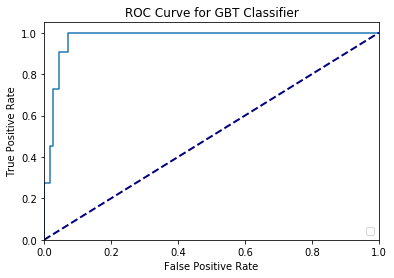



 AUC score for GBT Classifier:  0.9752791068580542


In [98]:
### applying the model on test data
y_predicted_gbtc = gbtc.predict(X_test)

### accuracy of gbtc
print("Accuracy of GBT:", metrics.accuracy_score(y_test, y_predicted_gbtc),"\n\n")

### classification report
print("Classification Report of GBT: \n", metrics.classification_report(y_test, y_predicted_gbtc), "\n\n")

### probability of predicting correct y
y_predicted_prob_gbtc = gbtc.predict_proba(X_test)[:, 1]

### ROC Curve
fpr_gbt, tpr_gbt, thresholds_gbt = metrics.roc_curve(y_test, y_predicted_prob_gbtc)

### plotting ROC curve
plt.figure()
lw_1 = 2
plt.plot(fpr_gbt, tpr_gbt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw_1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for GBT Classifier')
plt.legend(loc="lower right")
plt.show()

### AUC score
auc_score_gbtc = roc_auc_score(y_test, y_predicted_prob_gbtc)
print("\n\n AUC score for GBT Classifier: ",auc_score_gbtc)